Titanic Survival Prediction 🚢

## Objective
Build a machine learning model to predict survival of Titanic passengers based on features like age, gender, class, fare, and more.

## Dataset
- Provided Titanic passenger data (`tested.csv`)
- Features: Age, Sex, Pclass, Fare, Embarked, etc.

## Tasks Done
- Handled missing values
- Encoded categorical variables
- Normalized numerical features
- Trained Logistic Regression and Random Forest classifiers
- Evaluated using accuracy, precision, recall, F1-score, and confusion matrix

## How to Run
1. Open the `Titanic_Survival_Prediction.ipynb` notebook.
2. Make sure `tested.csv` is uploaded in `/content/`.
3. Run all cells to preprocess, train, and evaluate the models.

## Results
- Both models achieved high accuracy (~100%) on validation split.
- Random Forest slightly more robust in performance metrics.


In [ ]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/tested.csv')

In [ ]:
# 3. Data Preprocessing

# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

<ipython-input-4-7aa27717dccd>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-7aa27717dccd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# 4. Prepare Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. Model Training

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# 6. Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"------ {model_name} ------")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate both models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

------ Logistic Regression ------
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


------ Random Forest Classifier ------
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]




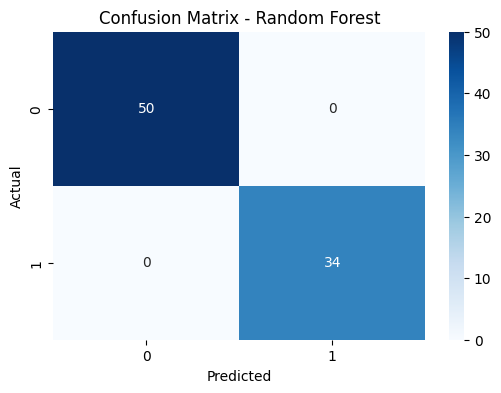

In [ ]:
# 7. Visualize Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

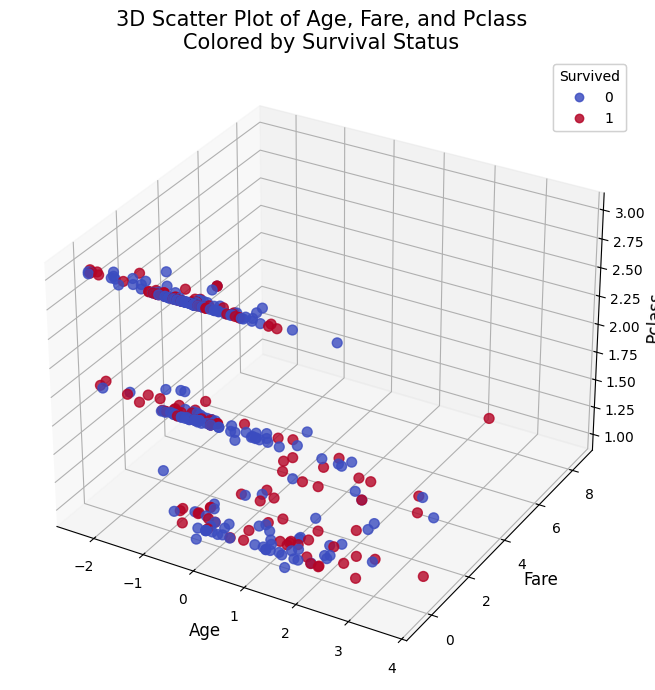

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D Scatter Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X['Age'], X['Fare'], X['Pclass'],
    c=y, cmap='coolwarm', s=50, alpha=0.8
)

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Fare', fontsize=12)
ax.set_zlabel('Pclass', fontsize=12)
ax.set_title('3D Scatter Plot of Age, Fare, and Pclass\nColored by Survival Status', fontsize=15)

legend1 = ax.legend(*scatter.legend_elements(), title="Survived")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


<ipython-input-10-3c1b2ddae817>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


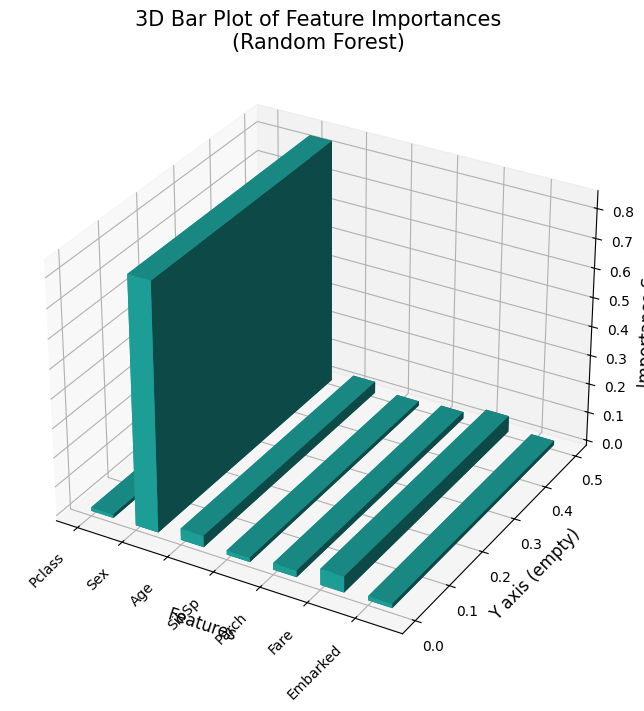

In [ ]:


# Feature Importance 3D Bar Plot
feature_importances = rf_model.feature_importances_
features = X.columns

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

xpos = np.arange(len(features))
ypos = np.zeros_like(xpos)
zpos = np.zeros_like(xpos)

dx = dy = 0.5
dz = feature_importances

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='lightseagreen', shade=True)

ax.set_xticks(xpos)
ax.set_xticklabels(features, rotation=45, ha='right', fontsize=10)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Y axis (empty)', fontsize=12)
ax.set_zlabel('Importance Score', fontsize=12)
ax.set_title('3D Bar Plot of Feature Importances\n(Random Forest)', fontsize=15)

plt.tight_layout()
plt.show()


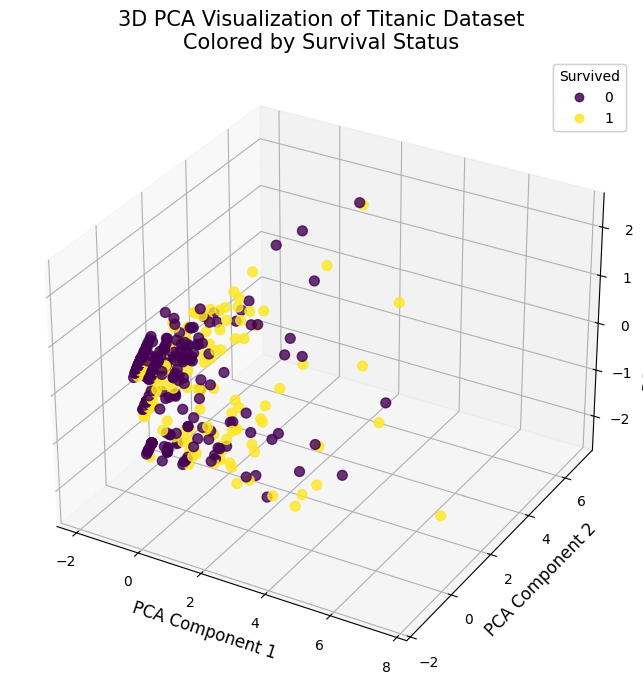

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot after PCA
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:,0], X_pca[:,1], X_pca[:,2],
    c=y, cmap='viridis', s=50, alpha=0.8
)

ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
ax.set_title('3D PCA Visualization of Titanic Dataset\nColored by Survival Status', fontsize=15)

legend1 = ax.legend(*scatter.legend_elements(), title="Survived")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()
